## IMPORT LIBRARIES

In [2]:
import pandas as pd
import json
import re
from unidecode import unidecode
import nltk

In [3]:
from nltk.corpus import stopwords
from wordcloud import WordCloud


## LOAD BASES

In [4]:
path = "../data/data_music_clean.json"
f = open(path)
data_json = json.load(f)
data_json.keys()

dict_keys(['17 Léguas e Meia', '2001', 'Abri a Porta', 'A Bruxa de Mentira', 'Acertei No Milhar', 'A Ciência Em Si', 'A Coisa Mais Linda Que Existe', 'A Debandada', 'Afoxé É', 'A Gaivota', 'Água Benta', 'Água de Meninos', 'A Linha e o Linho', 'A Luta Contra a Lata ou A Falência do Café', 'A Mão da Limpeza', 'Amarra o Teu Arado a Uma Estrela', 'Amor até o fim', 'A Moreninha', 'Andar Com Fé', 'A Novidade', 'Aos pes da cruz', 'A Paz', 'Aquele Abraço', 'Aquele Abraço ( Acoustic)', 'Aqui e Agora', 'A Raça Humana', 'A Rua', 'Asa Branca', 'A Situação Do Escurinho', 'A Sociedade Afluente', 'Assum Preto', 'Átimo de Pó', 'A Última Coisa Bonita', 'A Volta da Asa Branca', 'A Voz do Vivo', 'Axé, Babá', 'Babá Alapalá', 'Baby Hippie', 'Back in Bahia', 'Back in Bahia (Amor e Sorte)', 'Back In Bahia / Atrás do Trio Elétrico', 'Baião atemporal', 'Baião da Penha', 'Balafon', 'Banda Um', 'Barca Grande', 'Beira-Mar', 'Beira-Mar (Acoustic)', 'Buda Nagô', 'Caçada das Leoas', 'Cada Macaco no Seu Galho', 'Cada

In [5]:
base_pos = pd.DataFrame.from_dict(data_json, orient='index')
base_pos.reset_index(inplace=True)
base_pos.columns = ["Musica", "Letra"]
print(base_pos.shape)
base_pos.head()

(323, 2)


,Musica,Letra
0,17 Léguas e Meia,eu já andei sem parar dezessete légua e meia p...
1,2001,astronauta libertado minha vida me ultrapassa ...
2,Abri a Porta,abri a porta apareci a mais bonita sorriu pra ...
3,A Bruxa de Mentira,a bruxa de mentira bombom de rapadura saborosa...
4,Acertei No Milhar,"etelvina, acertei no milhar ganhei quinhentos ..."


In [6]:
base_pos.isnull().sum()

Musica    0
Letra     0
dtype: int64

In [7]:
## Check if we have duplicated lyrics

filtro_duplicated = base_pos.duplicated(subset=["Letra"], keep="first")
base_pos[filtro_duplicated]["Letra"].values

array(['essa ladeira que ladeira é essa? essa é a ladeira da preguiça preguiça que eu tive sempre de escrever para a família e de mandar contar pra casa que esse mundo é uma maravilha e pra saber se a menina já conta as estrelas e sabe a segunda cartilha e pra saber se o menino já canta cantigas e já não bota mais a mão na barguilha e pra falar do mundo, falar uma besteira formenteira é uma ilha onde se chega de barco, mãe que nem lá na ilha do medo que nem lá na ilha do frade que nem lá na ilha de maré que nem lá salina das margaridas essa ladeira que ladeira é essa? essa é a ladeira da preguiça ela não é de hoje ela é desde quando se amarrava cachorro com linguiça'],
      dtype=object)

In [8]:
## Lets exclude the duplicated rows 

base_pos = base_pos[~filtro_duplicated]
print(base_pos.shape)
base_pos.head(10)

(322, 2)


,Musica,Letra
0,17 Léguas e Meia,eu já andei sem parar dezessete légua e meia p...
1,2001,astronauta libertado minha vida me ultrapassa ...
2,Abri a Porta,abri a porta apareci a mais bonita sorriu pra ...
3,A Bruxa de Mentira,a bruxa de mentira bombom de rapadura saborosa...
4,Acertei No Milhar,"etelvina, acertei no milhar ganhei quinhentos ..."
5,A Ciência Em Si,se toda coincidência tende a que se entenda e ...
6,A Coisa Mais Linda Que Existe,coisa mais linda nesse mundo é sair por um seg...
7,A Debandada,aah! yona yona yona yona yona yona yona yona y...
8,Afoxé É,"êô, êô êô, êô é bom pa ioiô (é bom pa ioiô) é ..."
9,A Gaivota,gaivota menina de asas paradas voando no sonho...


In [9]:
stopwords_list = stopwords.words('portuguese')

In [10]:
def stop_words(no_punctuation):
    text_list = no_punctuation.split(' ')
    list_text_nostopword = []
    for word in text_list:
        if word not in stopwords_list:
            list_text_nostopword.append(word)

    delimiter = " "  # Delimiter to use between elements

    result_string = delimiter.join(list_text_nostopword)
    return result_string

# stop_words(no_punctuation)

In [11]:
# list_text_nostopword = ""
# for word in text_list:
#     if word not in stopwords_list:
#         list_text_nostopword += word + " "

# list_text_nostopword.strip()

In [12]:
def normalize_texts(text):
    lower = text.lower()
    NON_ALPHANUM = re.compile(r'[\W]')
    no_punctuation = NON_ALPHANUM.sub(r' ', lower)
    text_nostopword = stop_words(no_punctuation)
    normalized_text = unidecode(text_nostopword)
    return normalized_text

# text0 = base_pos["Letra"].values[240]
# normalize_texts(text0)

base_pos["Letra_Normalized"] = base_pos["Letra"].apply(lambda x: normalize_texts(x))
print(base_pos.shape)
base_pos.head(10)

(322, 3)


,Musica,Letra,Letra_Normalized
0,17 Léguas e Meia,eu já andei sem parar dezessete légua e meia p...,andei parar dezessete legua meia pra ir forro ...
1,2001,astronauta libertado minha vida me ultrapassa ...,astronauta libertado vida ultrapassa qualquer ...
2,Abri a Porta,abri a porta apareci a mais bonita sorriu pra ...,abri porta apareci bonita sorriu pra mim naque...
3,A Bruxa de Mentira,a bruxa de mentira bombom de rapadura saborosa...,bruxa mentira bombom rapadura saborosa figura ...
4,Acertei No Milhar,"etelvina, acertei no milhar ganhei quinhentos ...",etelvina acertei milhar ganhei quinhentos con...
5,A Ciência Em Si,se toda coincidência tende a que se entenda e ...,toda coincidencia tende entenda toda lenda que...
6,A Coisa Mais Linda Que Existe,coisa mais linda nesse mundo é sair por um seg...,coisa linda nesse mundo sair segundo encontrar...
7,A Debandada,aah! yona yona yona yona yona yona yona yona y...,aah yona yona yona yona yona yona yona yona y...
8,Afoxé É,"êô, êô êô, êô é bom pa ioiô (é bom pa ioiô) é ...",eo eo eo eo bom pa ioio bom pa ioio bom pa...
9,A Gaivota,gaivota menina de asas paradas voando no sonho...,gaivota menina asas paradas voando sonho d agu...


In [13]:
all_words = [text for text in base_pos["Letra_Normalized"]]

delimiter = " "  # Delimiter to use between elements

all_words_string = delimiter.join(all_words)
all_words_string

'andei parar dezessete legua meia pra ir forro dancar ai  ai  ai  ai  ai  ai forro dancar valeu pena andar dezessete legua meia pois rosinha tava la ai  ai  ai  ai  ai  ai rosinha tava la cheguei forro moido  carne viva lapada logo socorrido tomando tres talagada ze sanfoneiro gemeu fole baiao rodei rosa terreiro  rocando coracao rodei rosa terreiro  rocando coracao ai  ai  ai tentacao astronauta libertado vida ultrapassa qualquer rota faca dei grito escuro parceiro futuro reluzente galaxia quase posso palpar vida grita emprenha reproduz velocidade luz cor ceu compoe mar azul dissolve equacao propoe computador resolve  amei velocidade casei sete planetas filho  cor espaco faco rota anoluz calculo dentro passo dor cicatriz morte quis  bracos dois mil anos nasci ter idade casado solteiro baiano estrangeiro sangue gasolina correndo magoa peito sal fruta fervendo copo d agua abri porta apareci bonita sorriu pra mim naquele instante convenci bom vida vai prosseguir vai prosseguir vai da pra

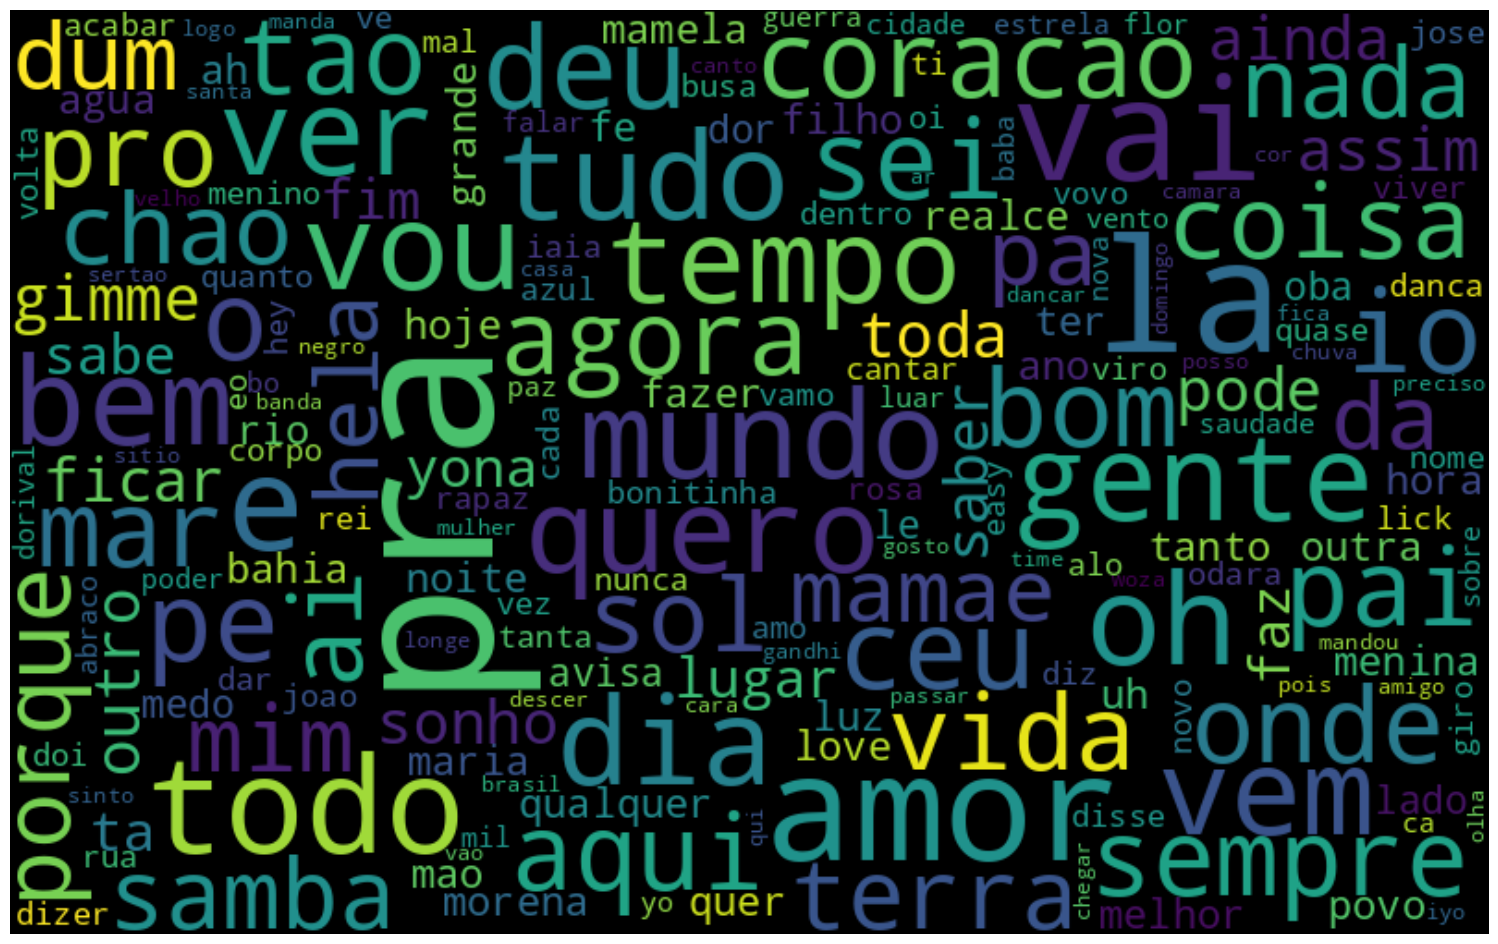

In [14]:
import matplotlib.pyplot as plt

word_cloud = WordCloud(width= 800, height= 500,
                        max_font_size = 110,
                        collocations = False).generate(all_words_string)
# Plotando nuvem de palavras
plt.figure(figsize=(24,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()